# Finding GPS Signals with Correlation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 
import sys

### Function for cross-correlation

In [2]:
def cross_correlation(array1, array2):
    correlated_array = np.correlate(array1, array2, 'full')
    end_index = len(array1)
    st_index = -len(array2) + 1
    
    indices = np.arange(st_index, end_index)    
    return (indices, correlated_array)

### Function generating gold codes

In [3]:
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    shamt = delay[satellite_ID - 1]
    G2_out = np.roll(MLS2,shamt)
    
    CA_code = G1_out * G2_out
    
    return CA_code

In [4]:
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0, 1, length_of_noise)
    return noise_array

## Fetching Gold codes for different satellites

In [5]:
sig_1 = Gold_code_satellite(1)
sig_2 = Gold_code_satellite(2)
sig_3 = Gold_code_satellite(3)
sig_4 = Gold_code_satellite(4)
sig_5 = Gold_code_satellite(5)
sig_6 = Gold_code_satellite(6)
#This has to be done for all 24 signals. You can use a loop.

## Generating received signal r[t] =s1[t-250]+s2[t-500]+n

<StemContainer object of 3 artists>

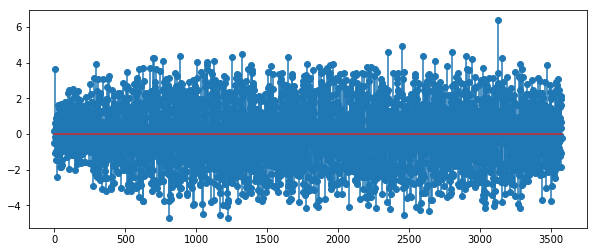

In [6]:
sig1 =np.concatenate((np.zeros(250), sig_1, sig_1, sig_1, np.zeros(506-250)), axis=None)
sig2 =np.concatenate((np.zeros(500), sig_2, sig_2, sig_2, np.zeros(506-500)), axis=None)
gaussrand_signal = gaussiannoise_generator(len(sig1))
received12=sig1+sig2+gaussrand_signal
plt.figure(figsize=(10, 4))
plt.stem(received12)

## Linear cross-correlation of s1, s2, s3 etc with respect to received signal r

Text(0.5, 1.0, 'Corr_r (s4)')

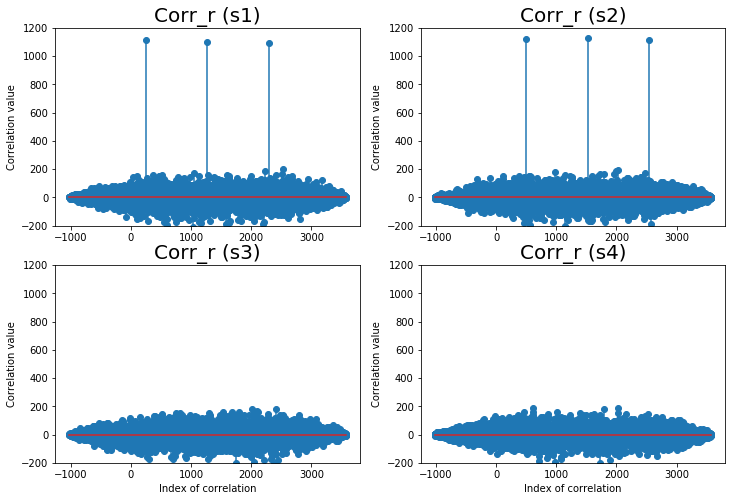

In [7]:
(ind1, xcorr1) = cross_correlation(received12, sig_1)
(ind2, xcorr2) = cross_correlation(received12, sig_2)
(ind3, xcorr3) = cross_correlation(received12, sig_3)
(ind4, xcorr4) = cross_correlation(received12, sig_4)
(ind5, xcorr5) = cross_correlation(received12, sig_5)
(ind6, xcorr6) = cross_correlation(received12, sig_6)
#This has to be done for all 24 signals. You can use a loop.


plt.figure(figsize=(12, 8))

ax1=plt.subplot(2, 2, 1)
ax1.stem(ind1, xcorr1)
ax1.set_xlabel("")
ax1.set_ylabel("Correlation value")
ax1.set_ylim([-200, 1200])
ax1.set_title("Corr_r (s1)", fontsize=20)

ax2=plt.subplot(2, 2, 2)
ax2.stem(ind2, xcorr2)
ax2.set_xlabel("")
ax2.set_ylim([-200, 1200])
ax2.set_ylabel("Correlation value")
ax2.set_title("Corr_r (s2)", fontsize=20)

ax3=plt.subplot(2, 2, 3)
ax3.stem(ind3, xcorr3)
ax3.set_xlabel("Index of correlation")
ax3.set_ylim([-200, 1200])
ax3.set_ylabel("Correlation value")
ax3.set_title("Corr_r (s3)", fontsize=20)

ax4=plt.subplot(2, 2, 4)
ax4.stem(ind4, xcorr4)
ax4.set_xlabel("Index of correlation")
ax4.set_ylim([-200, 1200])
ax4.set_ylabel("Correlation value")
ax4.set_title("Corr_r (s4)", fontsize=20)

# Image Search with Correlation

### Initialization
First, run this command in your terminal to install for "import cv2" to work, otherwise you will get ModuleNotFoundError:

    pip install opencv-python

Then run the code in the next blocks to set up functions that the other blocks
depend on.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import cv2
%matplotlib inline

In [9]:
def jpg2bin(image, thresh):
    image_gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    image_bw = cv2.threshold(image_gray, thresh, 255, cv2.THRESH_BINARY)[1]
    image_bin=image_bw/255.0
    img_arr=image_bin*2-1;
    #img_vec = np.reshape(img_arr, (1,:))
    return img_arr

Text(0.5, 1.0, 'Signature')

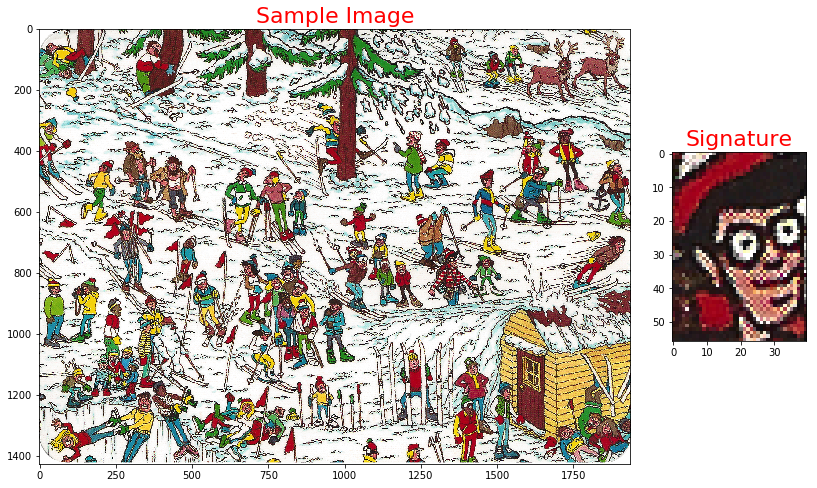

In [10]:
whereiswaldo = mpimg.imread('whereiswaldo.jpg')
big=jpg2bin('whereiswaldo.jpg', 128)

#whereiswaldo = mpimg.imread('waldoisnothere.jpg')
#big=jpg2bin('waldoisnothere.jpg', 128)


waldo = mpimg.imread('signature.jpg')
small = jpg2bin('signature.jpg', 128)

h=len(small)
w=len(small[0])

H=len(big)
W=len(big[0])

plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1,5)
ax1=plt.subplot(gs[:, :4])
ax1.imshow(whereiswaldo)
ax1.set_title('Sample Image', fontsize=22, color='red')
ax2=plt.subplot(gs[:, 4])
ax2.imshow(waldo)
ax2.set_title('Signature', fontsize=22, color='red')


In [11]:
xcorr=np.zeros((H,W))
template=np.reshape(small, (1, np.size(small)))
for x in range(int(h/2), int(H-h/2)):
    for y in range(int(w/2), int(W-w/2)):
        snippet=big[int(x-h/2):int(x+h/2), int(y-w/2):int(y+w/2)]
        extracted=np.reshape(snippet, (1, np.size(small)))
        xcorr[x,y]= np.inner(template, extracted)
        #xcorr[x,y]= np.sum(np.dot(small, snippet))
        if xcorr[x,y]==h*w:
            break

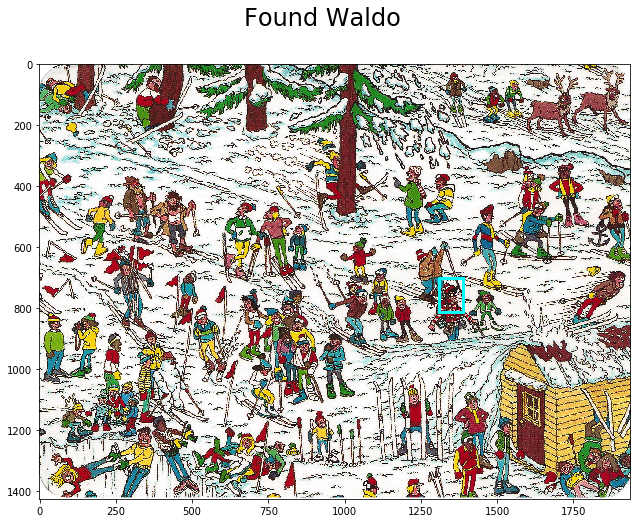

In [12]:
image = whereiswaldo
if np.max(xcorr)> (0.9*h*w):
    waldo_x=np.argwhere(xcorr==np.max(xcorr))[0,1]  
    waldo_y=np.argwhere(xcorr==np.max(xcorr))[0,0]  

    # Rectangle co-ordinates
    start_point = (waldo_x-int(w), waldo_y-int(h)) 
    end_point = (waldo_x+int(w), waldo_y+int(h)) 
  
    # Line color = cyan
    color = (0, 255, 255)   
    # Line thickness =10px 
    thickness = 10
    # Draw a rectangle at the specified co-ordinate
    image = cv2.rectangle(image, start_point, end_point, color, thickness) 
  
    # Displaying the image  
    plt.figure(figsize=(14, 8))
    plt.suptitle('Found Waldo', fontsize=24)
    plt.imshow(image)

else: 
    print('Waldo is not here!')